COC602 - Trabalho 4 Cluster

Aluno: Carlos Henrique Ferreira Brito Filho

DRE: 120081409

Curso: Engenharia de Computação e Informação

## Importando as bibliotecas

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import re

## Download e leitura dos arquivos necessários

In [39]:
df_ratings = pd.read_csv('./ml-1m/ratings.dat', sep='::', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'], encoding='latin1', engine='python')
df_movies = pd.read_csv('./ml-1m/movies.dat', sep='::', header=None, names=['movie_id', 'title', 'genres'], encoding='latin1', engine='python')

## Análise exploratória dos dados

In [40]:
df_ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [41]:
df_movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [42]:
n_users = df_ratings.user_id.unique().shape[0]
n_items = df_ratings.movie_id.unique().shape[0]
n_ratings = len(df_ratings)

print('Quantidade de usuários: {}'.format(n_users))
print('Quantidade de filmes: {}'.format(n_items))
print('Quantidade de avaliações: {}'.format(n_ratings))


Quantidade de usuários: 6040
Quantidade de filmes: 3706
Quantidade de avaliações: 1000209


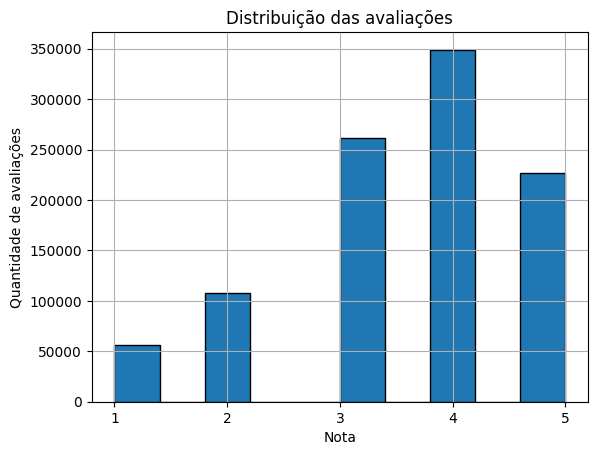

In [43]:
df_ratings['rating'].hist(edgecolor='black')
plt.title('Distribuição das avaliações')
plt.xlabel('Nota')
plt.ylabel('Quantidade de avaliações')
plt.xticks([1, 2, 3, 4, 5])
plt.show()


In [44]:
def extract_year(title):
    match = re.search(r'\((\d{4})\)', title)
    if match:
        return match.group(1)
    return None
df_movies_ead = df_movies.copy()
df_movies_ead['year'] = df_movies_ead['title'].apply(extract_year)

genres_split = df_movies_ead['genres'].str.get_dummies(sep='|')

df_movies_ead = pd.concat([df_movies_ead, genres_split], axis=1)

df_movies_ead.drop('genres', axis=1, inplace=True)
df_movies_ead.head()

,movie_id,title,year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1995,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


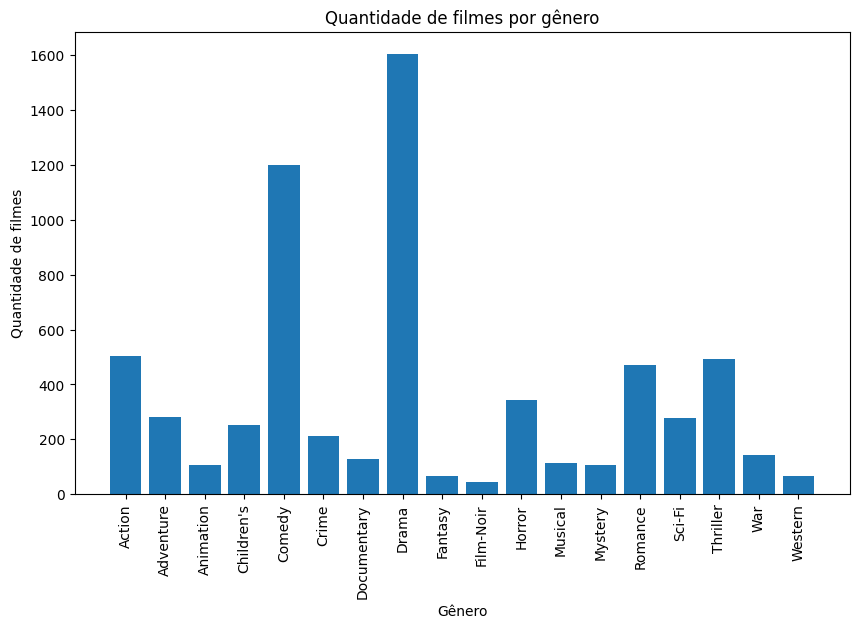

In [45]:
genres = genres_split.columns
genres_count = genres_split.sum().values

plt.figure(figsize=(10, 6))
plt.bar(genres, genres_count)
plt.xticks(rotation=90)
plt.title('Quantidade de filmes por gênero')
plt.ylabel('Quantidade de filmes')
plt.xlabel('Gênero')
plt.show()


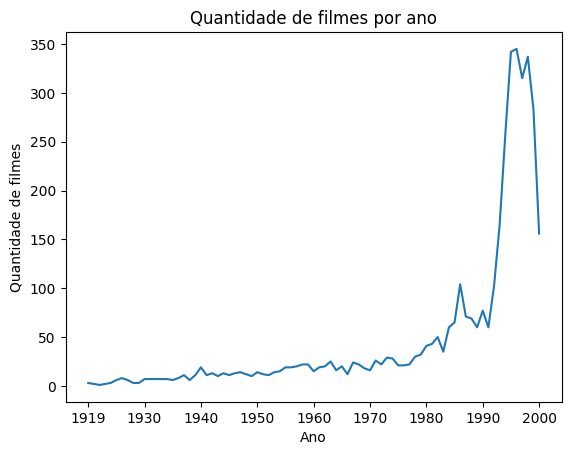

In [46]:
df_movies_ead.groupby('year').size().plot()
plt.title('Quantidade de filmes por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de filmes')
plt.show()

In [47]:
most_watched = df_ratings.groupby('movie_id').size().sort_values(ascending=False)

most_watched = pd.DataFrame({'movie_id': most_watched.index, 'count': most_watched.values})

most_watched['mean'] = df_ratings.groupby('movie_id')['rating'].mean().values

most_watched = pd.merge(most_watched, df_movies, on='movie_id')

print("Top 10 filmes mais assistidos:")
most_watched[['mean', 'count', 'title']].head(10)


Top 10 filmes mais assistidos:


,mean,count,title
0,4.146846,3428,American Beauty (1999)
1,3.201141,2991,Star Wars: Episode IV - A New Hope (1977)
2,3.016736,2990,Star Wars: Episode V - The Empire Strikes Back...
3,2.729412,2883,Star Wars: Episode VI - Return of the Jedi (1983)
4,3.006757,2672,Jurassic Park (1993)
5,3.878723,2653,Saving Private Ryan (1998)
6,3.410480,2649,Terminator 2: Judgment Day (1991)
7,3.014706,2590,"Matrix, The (1999)"
8,2.656863,2583,Back to the Future (1985)
9,3.540541,2578,"Silence of the Lambs, The (1991)"


In [48]:
best_rated = df_ratings.groupby('movie_id')['rating'].agg(['mean', 'count'])
best_rated = best_rated[best_rated['count'] > 100]
best_rated = pd.merge(best_rated, df_movies, on='movie_id')
best_rated = best_rated.sort_values(by='mean', ascending=False)

print('Top 10 filmes com a melhor nota média e mais de 100 avaliações:')
best_rated[['mean', 'count', 'title']].head(10)

Top 10 filmes com a melhor nota média e mais de 100 avaliações:


,mean,count,title
1012,4.560510,628,Seven Samurai (The Magnificent Seven) (Shichin...
171,4.554558,2227,"Shawshank Redemption, The (1994)"
411,4.524966,2223,"Godfather, The (1972)"
373,4.520548,657,"Close Shave, A (1995)"
38,4.517106,1783,"Usual Suspects, The (1995)"
291,4.510417,2304,Schindler's List (1993)
562,4.507937,882,"Wrong Trousers, The (1993)"
442,4.491489,470,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
585,4.477725,2514,Raiders of the Lost Ark (1981)
425,4.476190,1050,Rear Window (1954)


In [49]:

print('ratings.dat:')
print('Quantidade de valores duplicados: {}'.format(df_ratings.duplicated().sum()))
print('Quantidade de valores faltantes: {}'.format(df_ratings.isnull().sum().sum()))


ratings.dat:
Quantidade de valores duplicados: 0
Quantidade de valores faltantes: 0


In [50]:
print('movies.dat:')
print('Quantidade de valores duplicados: {}'.format(df_movies.duplicated().sum()))
print('Quantidade de valores faltantes: {}'.format(df_movies.isnull().sum().sum()))

movies.dat:
Quantidade de valores duplicados: 0
Quantidade de valores faltantes: 0


Sobre o dataset podemos observar que não existem valores duplicados nem valores faltantes, mas continua sendo uma matriz esparsa, ja que muitos usuários não avaliaram muitos filmes. 

## Aplicação dos algoritmos de clusterização

In [51]:
user_item_matrix = df_ratings.pivot(index='user_id', columns='movie_id', values='rating')

user_avg_rating = user_item_matrix.mean(axis=1)

user_item_matrix = user_item_matrix.fillna(0)

user_item_matrix_subtracted = user_item_matrix.subtract(user_avg_rating, axis=0)

movie_user_matrix = user_item_matrix_subtracted.T
X = movie_user_matrix.values

In [52]:
scaler = StandardScaler()
scaled_movie_user_matrix = scaler.fit_transform(X)

In [53]:
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_movie_user_matrix)

Vamos observar os resultados obtidos com o algoritmo KMeans sem a utilização de PCA.

In [54]:
for cluster in range(n_clusters):
    cluster_movies = movie_user_matrix.iloc[cluster_labels == cluster].index
    movies = df_movies[df_movies['movie_id'].isin(cluster_movies)][['title', 'genres']]
    print('Cluster {}, tamanho {}'.format(cluster, np.sum(cluster_labels == cluster)))
    print('Filmes do cluster {}:'.format(cluster))
    print(movies.head(10))


Cluster 0, tamanho 3122
Filmes do cluster 0:
                                 title                    genres
2              Grumpier Old Men (1995)            Comedy|Romance
3             Waiting to Exhale (1995)              Comedy|Drama
4   Father of the Bride Part II (1995)                    Comedy
6                       Sabrina (1995)            Comedy|Romance
7                  Tom and Huck (1995)      Adventure|Children's
8                  Sudden Death (1995)                    Action
11  Dracula: Dead and Loving It (1995)             Comedy|Horror
12                        Balto (1995)      Animation|Children's
13                        Nixon (1995)                     Drama
14             Cutthroat Island (1995)  Action|Adventure|Romance
Cluster 1, tamanho 2
Filmes do cluster 1:
                         title                   genres
523    Schindler's List (1993)                Drama|War
586  Dances with Wolves (1990)  Adventure|Drama|Western
Cluster 2, tamanho 1
Filmes do

De interessante podemos observar:

- Cluster 7: possui dois filmes da franquia Star Wars
- Cluster 9: Possui diversos filmes de ficção científica
- Cluster 17: Possui dois filmes da franquia O Poderoso Chefão
- Cluster 10: Possui diversos filmes infantis.

Embora pareçam bons, também temos o cluster 14 que junta diversos filmes de crime (como Se7en e From Dusk Till Dawn) com o filme infantil Jumanji.

Vamos tentar utilizar o PCA para reduzir a dimensionalidade dos dados e tentar obter clusters mais significativos. Usamos um valor arbitrário de 20 clusters, mas podemos tentar outros valores. Além, disso, também procuraremos um valor melhor para o número de componentes do PCA.

# PCA

In [55]:
n_components = 2

pca = PCA(n_components=n_components)
pca_transformed_data_2 = pca.fit_transform(scaled_movie_user_matrix)

/var/folders/7b/0y05t52516g_yryyhc0cvctr0000gn/T/ipykernel_18718/2902792327.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20', n_clusters)


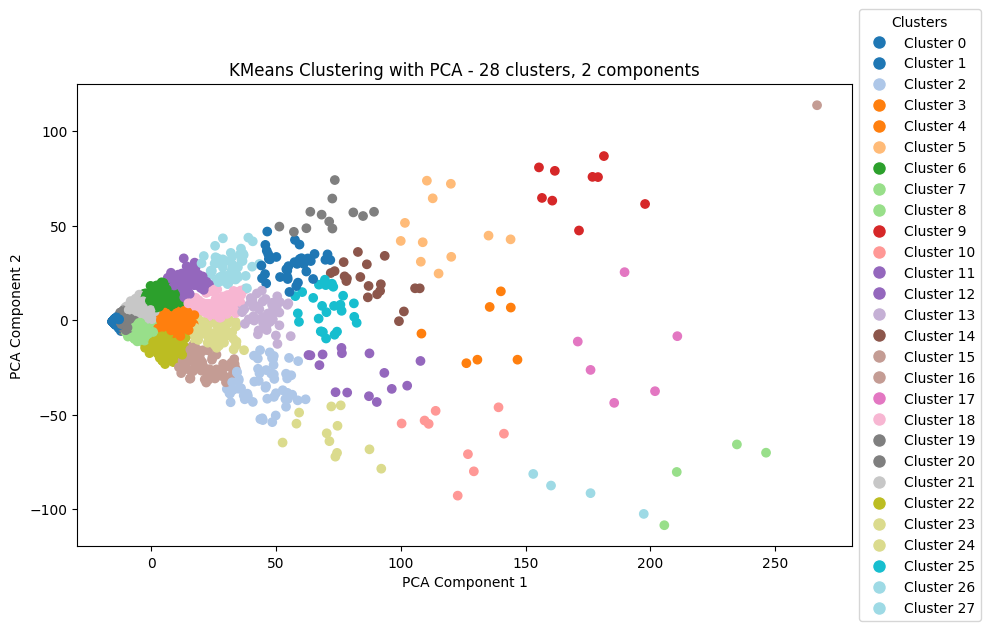

In [56]:
n_clusters = 28

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(pca_transformed_data_2)
cluster_labels_pca_2 = kmeans.predict(pca_transformed_data_2)

colormap = plt.cm.get_cmap('tab20', n_clusters)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_transformed_data_2[:, 0], pca_transformed_data_2[:, 1], c=cluster_labels_pca_2, cmap=colormap)

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colormap(i), markersize=10, label='Cluster {}'.format(i)) for i in range(n_clusters)]
plt.legend(handles=legend_handles, title='Clusters', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('KMeans Clustering with PCA - {} clusters, {} components'.format(n_clusters, n_components))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [57]:
for cluster in range(n_clusters):
    cluster_movies = movie_user_matrix.iloc[cluster_labels_pca_2 == cluster].index
    movies = df_movies[df_movies['movie_id'].isin(cluster_movies)][['title', 'genres']]
    print('Cluster {}, tamanho {}'.format(cluster, np.sum(cluster_labels_pca_2 == cluster)))
    print('Filmes do cluster {}:'.format(cluster))
    print(movies.head(10))


Cluster 0, tamanho 1526
Filmes do cluster 0:
                              title                genres
7               Tom and Huck (1995)  Adventure|Children's
26              Now and Then (1995)                 Drama
32          Wings of Courage (1995)     Adventure|Romance
34                Carrington (1995)         Drama|Romance
36    Across the Sea of Time (1995)           Documentary
37              It Takes Two (1995)                Comedy
39  Cry, the Beloved Country (1995)                 Drama
48     When Night Is Falling (1995)         Drama|Romance
52                  Lamerica (1994)                 Drama
53            Big Green, The (1995)     Children's|Comedy
Cluster 1, tamanho 35
Filmes do cluster 1:
                                    title                        genres
35                Dead Man Walking (1995)                         Drama
38                        Clueless (1995)                Comedy|Romance
353    Four Weddings and a Funeral (1994)                C

In [58]:
n_components = 3

pca = PCA(n_components=n_components)
pca_transformed_data_3 = pca.fit_transform(scaled_movie_user_matrix)

/var/folders/7b/0y05t52516g_yryyhc0cvctr0000gn/T/ipykernel_18718/2332146382.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20', n_clusters)


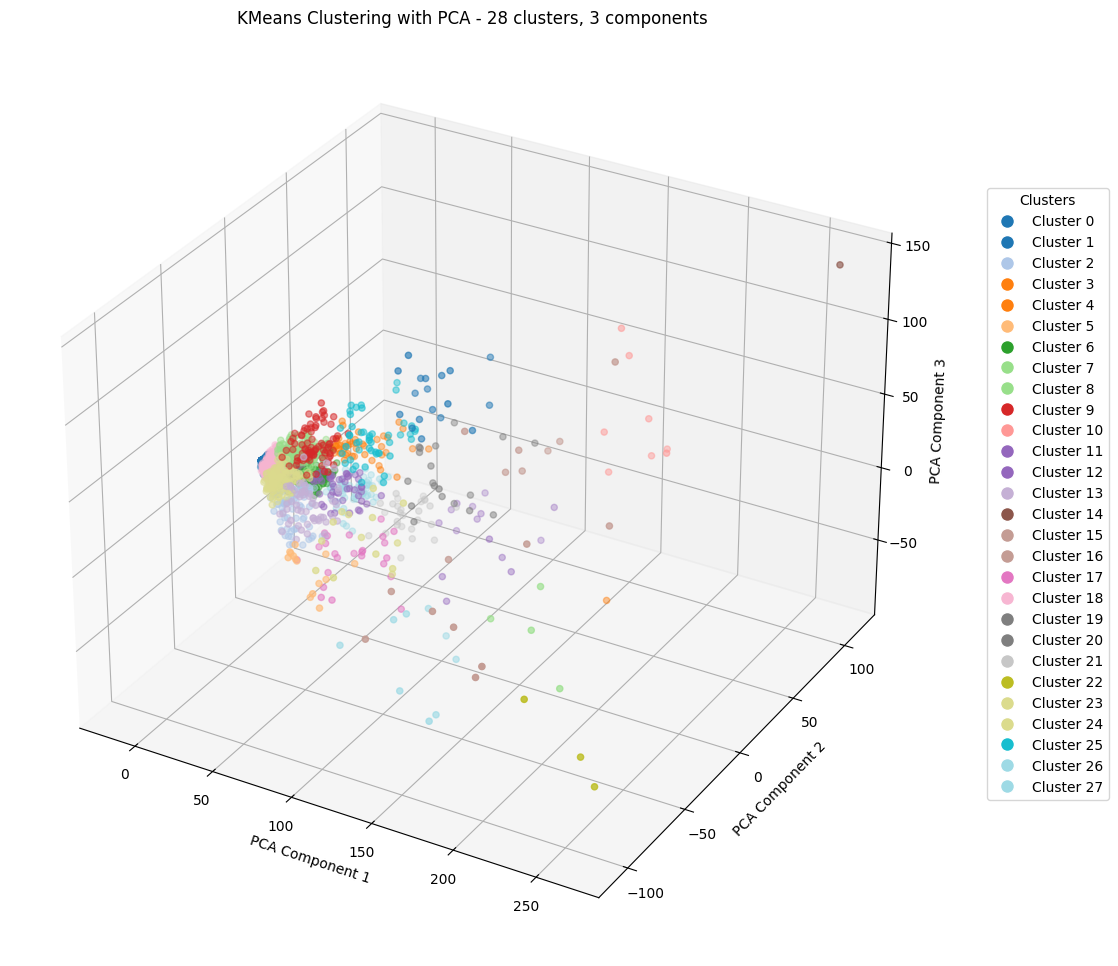

In [59]:
n_clusters = 28
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

kmeans.fit(pca_transformed_data_3)
cluster_labels_pca_3 = kmeans.predict(pca_transformed_data_3)

colormap = plt.cm.get_cmap('tab20', n_clusters)

fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_transformed_data_3[:, 0], pca_transformed_data_3[:, 1], pca_transformed_data_3[:, 2], c=cluster_labels_pca_3, cmap=colormap)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colormap(i), markersize=10, label='Cluster {}'.format(i)) for i in range(n_clusters)]
ax.legend(handles=legend_handles, title='Clusters', loc='center left', bbox_to_anchor=(1.05, 0.5))

plt.title('KMeans Clustering with PCA - {} clusters, {} components'.format(n_clusters, n_components))
plt.show()

In [60]:
for cluster in range(n_clusters):
    cluster_movies = movie_user_matrix.iloc[cluster_labels_pca_3 == cluster].index
    movies = df_movies[df_movies['movie_id'].isin(cluster_movies)][['title', 'genres']]
    print('Cluster {}, tamanho {}'.format(cluster, np.sum(cluster_labels_pca_3 == cluster)))
    print('Filmes do cluster {}:'.format(cluster))
    print(movies.head(10))


Cluster 0, tamanho 1889
Filmes do cluster 0:
                                                title                genres
7                                 Tom and Huck (1995)  Adventure|Children's
11                 Dracula: Dead and Loving It (1995)         Comedy|Horror
12                                       Balto (1995)  Animation|Children's
25                                     Othello (1995)                 Drama
26                                Now and Then (1995)                 Drama
29  Shanghai Triad (Yao a yao yao dao waipo qiao) ...                 Drama
32                            Wings of Courage (1995)     Adventure|Romance
34                                  Carrington (1995)         Drama|Romance
36                      Across the Sea of Time (1995)           Documentary
37                                It Takes Two (1995)                Comedy
Cluster 1, tamanho 18
Filmes do cluster 1:
                                             title  \
220                   

De interessante podemos observar:

- Cluster 22: Trilogia original de Star Wars
- Cluster 5: Possui diversos filmes de ficção científica, incluindo 5 da franquia Star Trek
- Cluster 2: Possui diversos filmes de animação
- Cluster 15: Possui diversos filmes de Bill Murray e Tom Hanks

Ainda assim não muito satisfatório, vamos tentar utilizar o SVD ao invés do PCA para tentar obter clusters mais significativos.

## SVD

In [61]:
n_components = 2
svd = TruncatedSVD(n_components=n_components)
svd_transformed_data_2 = svd.fit_transform(scaled_movie_user_matrix)

In [62]:
singular_values_squared = svd.explained_variance_

singular_values = np.sqrt(singular_values_squared)

sigma_matrix = np.diag(singular_values)

print("Matriz diagonal da decomposição SVD:")
print(sigma_matrix)

Matriz diagonal da decomposição SVD:
[[27.1079158  0.       ]
 [ 0.        12.6866866]]


/var/folders/7b/0y05t52516g_yryyhc0cvctr0000gn/T/ipykernel_18718/2633135023.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20', n_clusters)


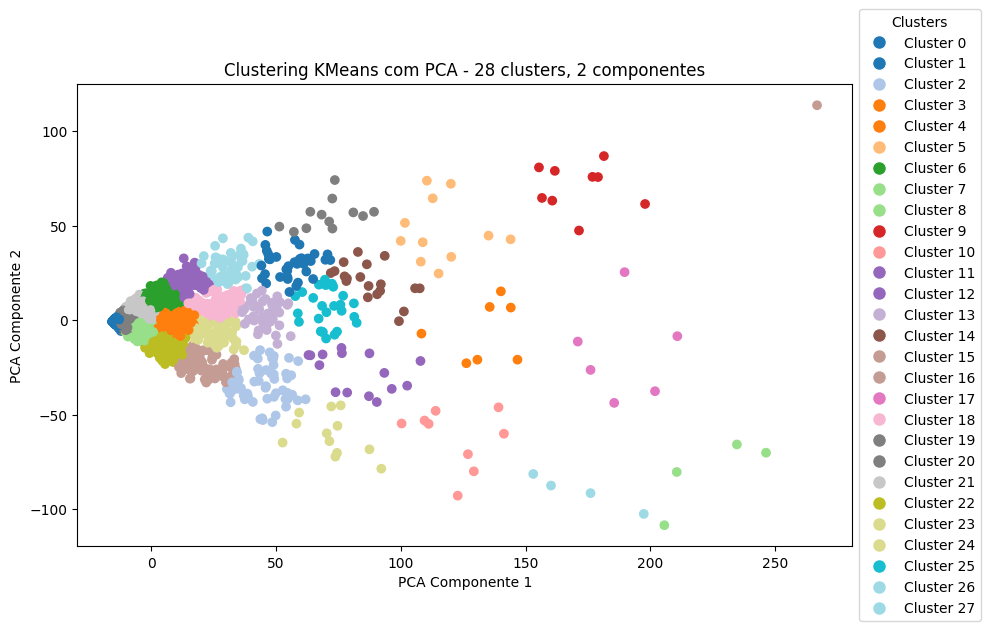

In [63]:
n_clusters = 28

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(svd_transformed_data_2)
cluster_labels_svd_2 = kmeans.predict(svd_transformed_data_2)

colormap = plt.cm.get_cmap('tab20', n_clusters)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(svd_transformed_data_2[:, 0], svd_transformed_data_2[:, 1], c=cluster_labels_svd_2, cmap=colormap)

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colormap(i), markersize=10, label='Cluster {}'.format(i)) for i in range(n_clusters)]
plt.legend(handles=legend_handles, title='Clusters', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Clustering KMeans com PCA - {} clusters, {} componentes'.format(n_clusters, n_components))
plt.xlabel('PCA Componente 1')
plt.ylabel('PCA Componente 2')
plt.show()


In [64]:
for cluster in range(n_clusters):
    cluster_movies = movie_user_matrix.iloc[cluster_labels_pca_3 == cluster].index
    movies = df_movies[df_movies['movie_id'].isin(cluster_movies)][['title', 'genres']]
    print('Cluster {}, tamanho {}'.format(cluster, np.sum(cluster_labels_pca_3 == cluster)))
    print('Filmes do cluster {}:'.format(cluster))
    print(movies.head(10))


Cluster 0, tamanho 1889
Filmes do cluster 0:
                                                title                genres
7                                 Tom and Huck (1995)  Adventure|Children's
11                 Dracula: Dead and Loving It (1995)         Comedy|Horror
12                                       Balto (1995)  Animation|Children's
25                                     Othello (1995)                 Drama
26                                Now and Then (1995)                 Drama
29  Shanghai Triad (Yao a yao yao dao waipo qiao) ...                 Drama
32                            Wings of Courage (1995)     Adventure|Romance
34                                  Carrington (1995)         Drama|Romance
36                      Across the Sea of Time (1995)           Documentary
37                                It Takes Two (1995)                Comedy
Cluster 1, tamanho 18
Filmes do cluster 1:
                                             title  \
220                   

## DBSCAN

In [65]:
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(pca_transformed_data_2)

labels = dbscan.labels_

unique_labels, counts = np.unique(labels, return_counts=True)
print("Clusters:", dict(zip(unique_labels, counts)))

Clusters: {-1: 843, 0: 2666, 1: 34, 2: 15, 3: 12, 4: 15, 5: 5, 6: 6, 7: 32, 8: 13, 9: 7, 10: 5, 11: 10, 12: 6, 13: 8, 14: 5, 15: 4, 16: 9, 17: 6, 18: 5}


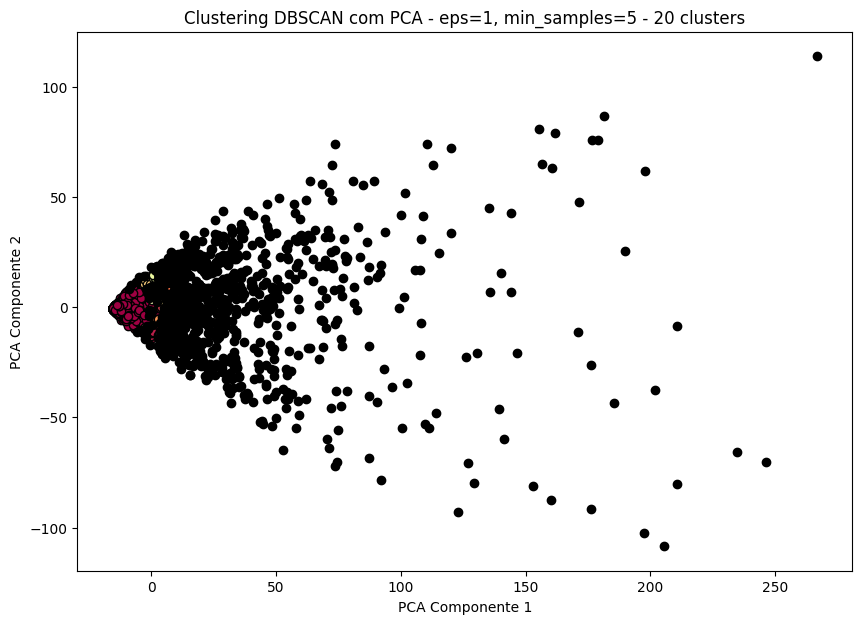

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = pca_transformed_data_2[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Clustering DBSCAN com PCA - eps=1, min_samples=5 - {} clusters'.format(len(unique_labels)))
plt.xlabel('PCA Componente 1')
plt.ylabel('PCA Componente 2')
plt.show()


In [67]:
for cluster in unique_labels:
    if cluster == -1:
        continue

    cluster_movies = movie_user_matrix.iloc[labels == cluster].index
    movies = df_movies[df_movies['movie_id'].isin(cluster_movies)][['title', 'genres']]
    print(f'Cluster {cluster}, tamanho {np.sum(labels == cluster)}')
    print(f'Filmes do cluster {cluster}:')
    print(movies.head(10))

Cluster 0, tamanho 2666
Filmes do cluster 0:
                                    title                    genres
3                Waiting to Exhale (1995)              Comedy|Drama
4      Father of the Bride Part II (1995)                    Comedy
7                     Tom and Huck (1995)      Adventure|Children's
8                     Sudden Death (1995)                    Action
11     Dracula: Dead and Loving It (1995)             Comedy|Horror
12                           Balto (1995)      Animation|Children's
13                           Nixon (1995)                     Drama
14                Cutthroat Island (1995)  Action|Adventure|Romance
17                      Four Rooms (1995)                  Thriller
18  Ace Ventura: When Nature Calls (1995)                    Comedy
Cluster 1, tamanho 34
Filmes do cluster 1:
                                   title                          genres
59    Indian in the Cupboard, The (1995)    Adventure|Children's|Fantasy
166               

De interessante podemos observar:

- Cluster 9: Possui diversos filmes de ficção científica
- Cluster 11: Possui diversos filmes de mistério

Porém, ainda assim, não obtivemos clusters muito significativos. Vamos tentar utilizar o DBSCAN + PCA com três componentes.

In [68]:
dbscan = DBSCAN(eps=4, min_samples=7)
dbscan.fit(pca_transformed_data_3)

labels = dbscan.labels_

unique_labels, counts = np.unique(labels, return_counts=True)
print("Clusters:", dict(zip(unique_labels, counts)))

Clusters: {-1: 642, 0: 3018, 1: 9, 2: 9, 3: 12, 4: 7, 5: 9}


/var/folders/7b/0y05t52516g_yryyhc0cvctr0000gn/T/ipykernel_18718/327431524.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20', n_clusters)
/var/folders/7b/0y05t52516g_yryyhc0cvctr0000gn/T/ipykernel_18718/327431524.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=color, marker=marker, label=f'Cluster {label}' if label != -1 else 'Noise')


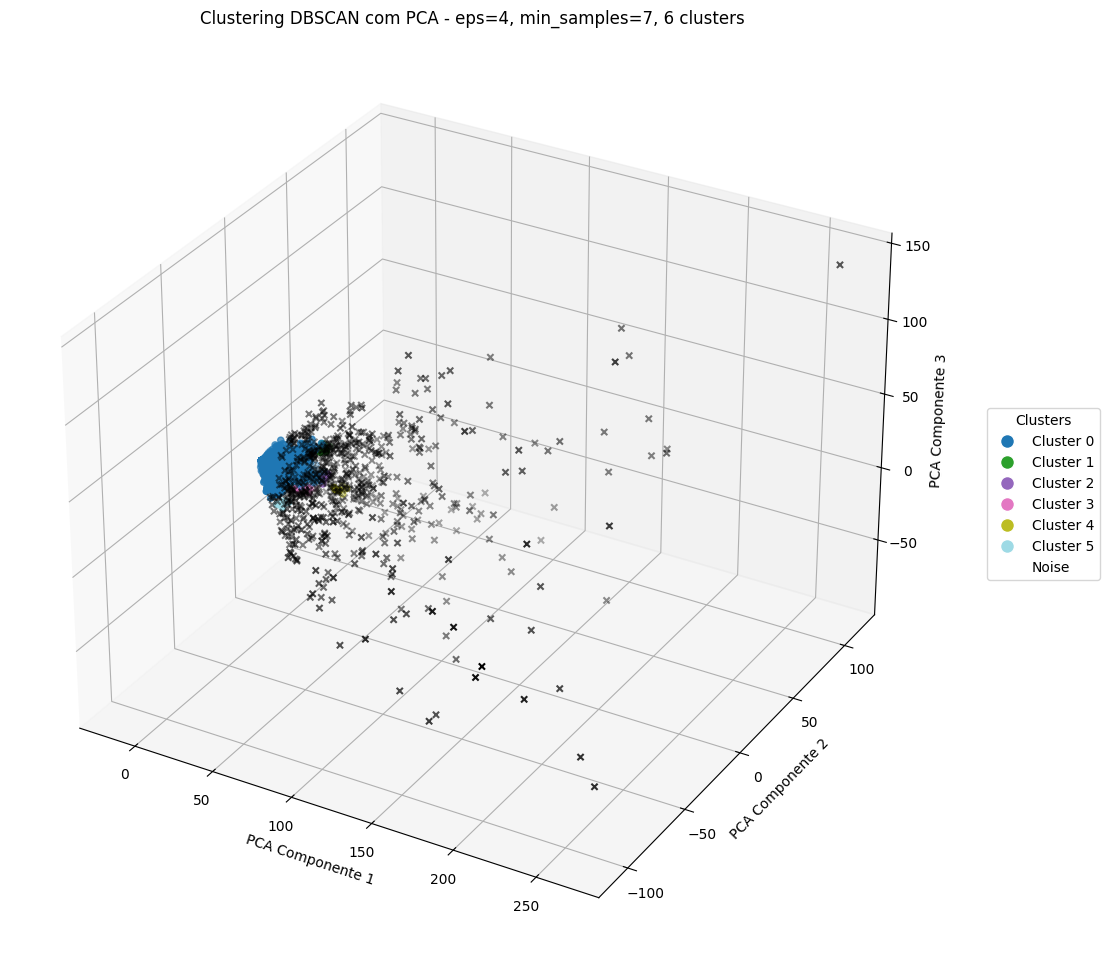

In [69]:
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
colormap = plt.cm.get_cmap('tab20', n_clusters)

fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

for label in unique_labels:
    if label == -1:
        color = 'k'
        marker = 'x'
    else:
        color = colormap(label)
        marker = 'o'

    class_member_mask = (labels == label)
    xyz = pca_transformed_data_3[class_member_mask]
    ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=color, marker=marker, label=f'Cluster {label}' if label != -1 else 'Noise')

ax.set_xlabel('PCA Componente 1')
ax.set_ylabel('PCA Componente 2')
ax.set_zlabel('PCA Componente 3')

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colormap(i), markersize=10, label=f'Cluster {i}') for i in range(n_clusters)]
if -1 in labels:
    legend_handles.append(plt.Line2D([0], [0], marker='x', color='w', markerfacecolor='k', markersize=10, label='Noise'))
ax.legend(handles=legend_handles, title='Clusters', loc='center left', bbox_to_anchor=(1.05, 0.5))

plt.title(f'Clustering DBSCAN com PCA - eps=4, min_samples=7, {n_clusters} clusters')
plt.show()

In [70]:
for cluster in unique_labels:
    if cluster == -1:
        continue

    cluster_movies = movie_user_matrix.iloc[labels == cluster].index
    movies = df_movies[df_movies['movie_id'].isin(cluster_movies)][['title', 'genres']]
    print(f'Cluster {cluster}, tamanho {np.sum(labels == cluster)}')
    print(f'Filmes do cluster {cluster}:')
    print(movies.head(10))

Cluster 0, tamanho 3018
Filmes do cluster 0:
                                 title                    genres
2              Grumpier Old Men (1995)            Comedy|Romance
3             Waiting to Exhale (1995)              Comedy|Drama
4   Father of the Bride Part II (1995)                    Comedy
6                       Sabrina (1995)            Comedy|Romance
7                  Tom and Huck (1995)      Adventure|Children's
8                  Sudden Death (1995)                    Action
11  Dracula: Dead and Loving It (1995)             Comedy|Horror
12                        Balto (1995)      Animation|Children's
13                        Nixon (1995)                     Drama
14             Cutthroat Island (1995)  Action|Adventure|Romance
Cluster 1, tamanho 9
Filmes do cluster 1:
                                                  title                genres
338                             Muriel's Wedding (1994)        Comedy|Romance
341   Adventures of Priscilla, Queen of th

De interessante podemos observar:
- Cluster 5: Possui diversos filmes de ficção científica
- Cluster 3: Possui diversos filmes de animação da Disney (embora insita em agrupar Carrie e Halloween...)
- Cluster 4: Possui diversos filmes noir

Depois de tentar diversos valores para os parâmetros do DBSCAN obtivemos clusters significativos, porém não muito satisfatórios em relação K-Means.

## Clustering hierárquico

In [71]:
n_clusters = 28

hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels_hierarchical = hierarchical.fit_predict(pca_transformed_data_2)

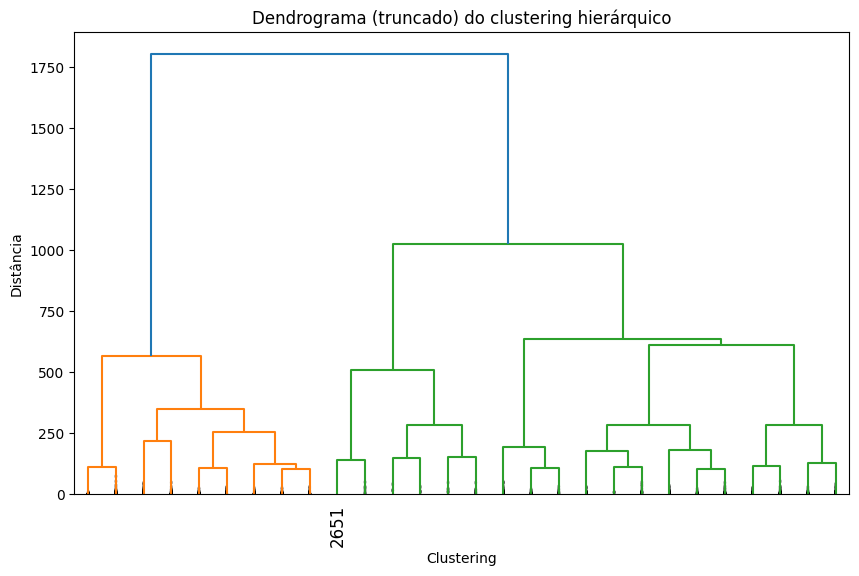

In [72]:

linked = linkage(pca_transformed_data_2, 'ward')

plt.figure(figsize=(10, 6))
dendrogram(linked,
           truncate_mode='lastp',
           p=n_clusters,
           show_leaf_counts=False,
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True)

plt.title('Dendrograma (truncado) do clustering hierárquico')
plt.xlabel('Clustering')
plt.ylabel('Distância')
plt.show()

/var/folders/7b/0y05t52516g_yryyhc0cvctr0000gn/T/ipykernel_18718/3445498951.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20', n_clusters)


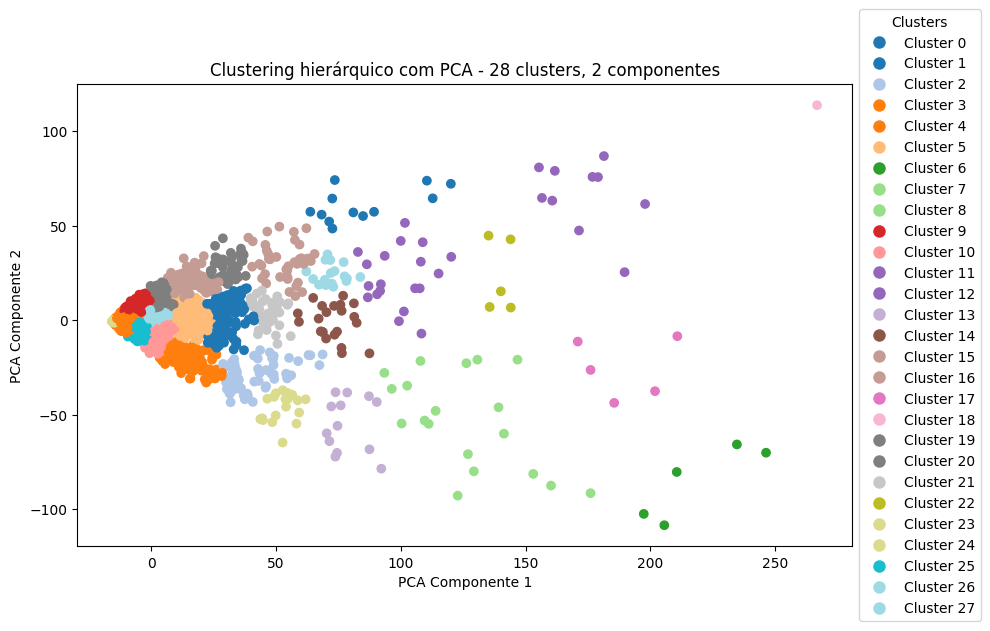

In [73]:
colormap = plt.cm.get_cmap('tab20', n_clusters)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_transformed_data_2[:, 0], pca_transformed_data_2[:, 1], c=cluster_labels_hierarchical, cmap=colormap)

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colormap(i), markersize=10, label='Cluster {}'.format(i)) for i in range(n_clusters)]
plt.legend(handles=legend_handles, title='Clusters', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Clustering hierárquico com PCA - {} clusters, {} componentes'.format(n_clusters, pca_transformed_data_2.shape[1]))
plt.xlabel('PCA Componente 1')
plt.ylabel('PCA Componente 2')
plt.show()

In [74]:
for cluster in range(n_clusters):
    cluster_movies = movie_user_matrix.iloc[cluster_labels_hierarchical == cluster].index
    movies = df_movies[df_movies['movie_id'].isin(cluster_movies)][['title', 'genres']]
    print('Cluster {}, tamanho {}'.format(cluster, np.sum(cluster_labels_hierarchical == cluster)))
    print('Filmes do cluster {}:'.format(cluster))
    print(movies.head(10))


Cluster 0, tamanho 88
Filmes do cluster 0:
                                      title                        genres
15                            Casino (1995)                Drama|Thriller
102                    Happy Gilmore (1996)                        Comedy
159                     Crimson Tide (1995)            Drama|Thriller|War
250       Interview with the Vampire (1994)                  Drama|Horror
437               Dazed and Confused (1993)                        Comedy
450                        Firm, The (1993)                Drama|Thriller
496                   Mrs. Doubtfire (1993)                        Comedy
551                     True Romance (1993)          Action|Crime|Romance
590  Snow White and the Seven Dwarfs (1937)  Animation|Children's|Musical
735                   Close Shave, A (1995)     Animation|Comedy|Thriller
Cluster 1, tamanho 12
Filmes do cluster 1:
                                       title                      genres
109                       T

De interessante podemos observar:

- Cluster 6: Possui diversos filmes de ficção científica, como a trilogia original Star Wars
- Cluster 7: Possui diversos filmes de ficção científicam, com os dois filmes da franquia Alien
- Cluster 18: Cluster de um filme só: American Beauty, o mais assistido do dataset


## Conclusão

Principais Observações:

- KMeans:

    Inicialmente, com 20 clusters e sem redução de dimensionalidade, os resultados mostraram agrupamentos interessantes como filmes de franquias específicas (Star Wars, O Poderoso Chefão) e gêneros (ficção científica, infantil).

    Utilizando PCA com 2 e 3 componentes, ajustamos o número de clusters para 28 e observamos agrupamentos mais refinados, embora alguns clusters ainda contivessem misturas de gêneros pouco relacionadas. Usando SVD com 2 componentes, foram obtidos clusters significativos, destacando franquias e gêneros específicos.

- DBSCAN:

    Com PCA, DBSCAN não gerou clusters tão significativos quanto o KMeans, mas ainda assim identificou alguns agrupamentos interessantes como filmes de ficção científica e mistério. Ajustes nos parâmetros do DBSCAN (eps e min_samples) mostraram que clusters significativos podem ser encontrados, mas a técnica ainda carece de clareza em comparação ao KMeans.

- Clustering Hierárquico:

    Aplicando a técnica de Agglomerative Clustering, foram obtidos clusters que destacaram franquias específicas e gêneros. O dendrograma permitiu visualizar a hierarquia dos agrupamentos, mostrando a relação de proximidade entre os clusters.

## Conclusão Final:

Entre as técnicas testadas, o KMeans combinado com PCA se mostrou mais eficaz em criar clusters significativos de filmes, especialmente ao explorar diferentes números de componentes e clusters. Os clusters gerados pelo KMeans capturaram bem algumas categorias de filmes, embora ainda houvesse algumas misturas. A utilização de PCA e SVD ajudou a reduzir a dimensionalidade dos dados, facilitando a visualização e a interpretação dos clusters. O DBSCAN, embora útil para identificar densidades de pontos, não produziu clusters tão claros quanto o KMeans. O Clustering Hierárquico forneceu insights adicionais sobre as relações entre os filmes, mas com menor clareza em alguns casos.